# Loading the Libraries

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu') # Choosing the devise

# Loading the Dataset and diving the test and train loaders

In [ ]:
train_set = datasets.MNIST( root="data", train=True, download=True, transform=ToTensor() )
test_set = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor() )       


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)) ]) # Normalizing the Images
# Pixel values of the image into a more standardized range,so that model converge faster during training and improve overall performance.

In [ ]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

# ***AutoEncoder ***
## The Autoencoder contains an encoder and decoder where encoder stores the images input in a compressed form and decoder retrieves back the Images.

In [ ]:
class AUTOEN(nn.Module):
    def __init__(self, in_features=784, latent_space=32, hidden_features=[256, 64]):
        super().__init__()
        self.in_features = temp_features = in_features
        self.latent_space = latent_space
        self.hidden_features = hidden_features

        self.encoder_modules = []
        for i in range(len(hidden_features)):
            self.encoder_modules.append(nn.Linear(temp_features, hidden_features[i]))
            self.encoder_modules.append(nn.ReLU()) # relu AF
            temp_features = hidden_features[i]

        self.encoder = nn.Sequential(*self.encoder_modules)
        self.bottleneck = nn.Sequential(nn.Linear(hidden_features[-1], latent_space),nn.ReLU())#  layer maps the encoder output to the latent space representation.

        self.hidden_features = self.hidden_features[::-1]

        temp_features = latent_space
        self.decoder_modules = [] # decoder part of the autoencoder,
        for i in range(len(hidden_features)):
            self.decoder_modules.append(nn.Linear(temp_features, self.hidden_features[i]))
            self.decoder_modules.append(nn.ReLU())
            temp_features = self.hidden_features[i]

        self.decoder = nn.Sequential(*self.decoder_modules)
        self.output = nn.Sequential(nn.Linear(self.hidden_features[-1], in_features),nn.ReLU()) # layer maps the decoder output to the reconstructed data.

    def forward(self, x): # Here the input (x) passes through the E, B, D, and output layers in order to reconstruct the input data that is X. 
        x = self.encoder(x)
        x = self.bottleneck(x)
        x = self.decoder(x)
        x = self.output(x)
        return x

In [ ]:
my_model = AUTOEN()

In [ ]:
next(iter(train_loader))[0].shape

torch.Size([64, 1, 28, 28])

In [ ]:
epochs = 30
lr = 0.001
opt = torch.optim.Adam(my_model.parameters(), lr=lr)
loss_fn = nn.MSELoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def train_(train_loader, model, epochs, opt, loss_fn, device):    # opt -  optimizer to update the model parameters
    model.to(device)
    model.train()
    train_loss = []
    for epoch in range(epochs): # number of epochs 
        total_loss = 0.0
        for images, _ in tqdm(train_loader):# batch size times
            images = images.to(device)
            images = images.view(images.shape[0], -1)
            opt.zero_grad() # opt gradient reseting
            pred = model(images)
            loss = loss_fn(images, pred)
            loss.backward() # backprp
            opt.step()# updating the model parameters
            total_loss += loss.item() # computing the loss

        avg_loss = total_loss / len(train_loader) # average loss cal after the the all batchs
        train_loss.append(avg_loss)
        print('Epoch {}--------- TRAINGING LOSS: {:.6f}'.format(epochs, avg_loss))

    return train_loss

In [ ]:
train_losses = train_(train_loader, my_model, epochs, opt, loss_fn, device)

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.039617


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.025583


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.022251


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.020416


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.019118


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.018136


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.017605


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.016859


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.016564


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.016177


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.015855


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.015186


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.015002


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014776


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014676


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014577


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014493


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014424


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014339


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014264


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014174


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014081


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.014037


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013955


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013920


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013866


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013817


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013781


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013748


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30--------- TRAINGING LOSS: 0.013709


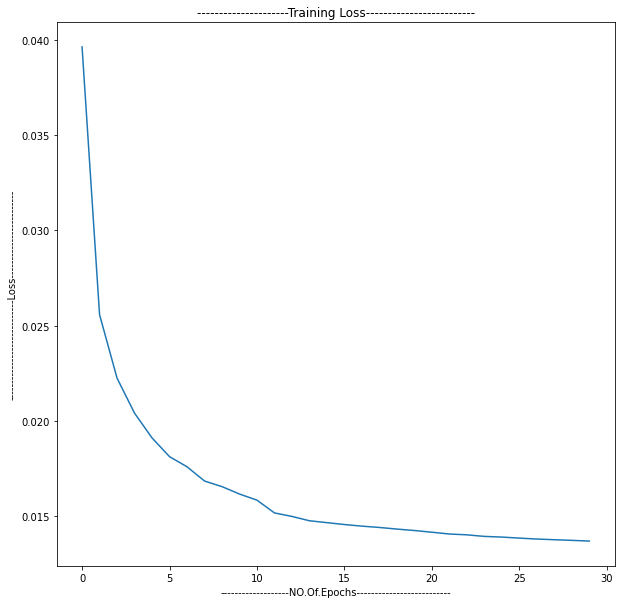

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses)
plt.title('---------------------Training Loss-------------------------')
plt.xlabel('-------------------NO.Of.Epochs--------------------------')
plt.ylabel('----------------------------Loss------------------------')
plt.show()